# **Assignment 1 Biostatistics**
Spyridon Alvanakis Apostolou
AM: ...

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import chi2
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import matplotlib.pyplot as plt

# **Exercise 1**

It is known that the average myocardial transit time in healthy individuals is 4.5sec. Myocardial transit time was measured in 10 patients with occluded right coronary arteries.

1) Test at the 5% significance level if the mean myocardial transit time of the population of patients with occluded right coronary arteries is equal to the value of 4.5sec. Present all steps of the test. Comment on whether the conclusions of the test are extended to all patients with occluded coronary arteries.
2) Test at the 5% significance level if the standard deviation of the myocardial transit time of the population of patients with occluded right coronary arteries is equal to 0.6 sec.

In [2]:
data = np.array([5.1, 5.6, 4.6, 3.8, 4.2, 5.1, 3.1, 3.7, 4.7, 3.3])
data

array([5.1, 5.6, 4.6, 3.8, 4.2, 5.1, 3.1, 3.7, 4.7, 3.3])

## Question 1

**Steps when the population variance is unknown:** 
- Step 1 : We set the null hypothesis $H_0: \mu=4.5$.
- Step 2 : We set the alternative hypothesis $H_1: \mu \neq 4.5 since the hypothesis is two-tailed.
- Step 3 : We set $t=\sqrt{n}\frac{\bar{x}-4.5}{s}$ (which follows the Student’s t distribution with n-1 degrees of freedom) where s is the sample standard deviation.
- Step 4 : We select the level of significance a and estimate the corresponding point $t_{a/2,n-1}$.
- Step 5 : We calculate the value of t for the sample.
- Step 6 : We reject the null hypothesis in favor of $H_1 : \mu \neq 4.5$  if $|t|>t_{a/2,n-1}$ (two-tailed hypothesis test).

In [3]:
a = 0.05
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)

In [4]:
t_val = (x_bar - 4.5) / (s / np.sqrt(n))
critical_t = stats.t.ppf(1 - a/2, df=n-1)

print(f"Calculated t-value: {t_val}")
print(f"Critical t-value: {critical_t}")


if abs(t_val) > critical_t:
    print("Reject the null hypothesis.")
    print("There is enough evidence at the 5% significance level to conclude that the mean myocardial transit time of patients with occluded right coronary arteries is different from 4.5 sec.")
else:
    print("Do not reject the null hypothesis.")
    print("""There is not enough evidence at the 5% significance
level to conclude that the mean myocardial transit time
of patients with occluded right coronary arteries is
different from 4.5 sec.""")

Calculated t-value: -0.6816356439122179
Critical t-value: 2.2621571627409915
Do not reject the null hypothesis.
There is not enough evidence at the 5% significance
level to conclude that the mean myocardial transit time
of patients with occluded right coronary arteries is
different from 4.5 sec.


In [5]:
margin_of_error = critical_t * (s / np.sqrt(n))
confidence_interval = (x_bar - margin_of_error, x_bar + margin_of_error)

print(f"95% confidence interval for the mean: {confidence_interval}")

95% confidence interval for the mean: (3.7226305799439445, 4.9173694200560565)


While the results suggest that the null hypothesis may hold true for a subset of patients with occluded coronary arteries, the limited sample size in this study cautions against generalizing these findings to a broader population of patients.

## Question 2

**Steps for hypothesis Tests for the Variance**

- Step 1: We set the null hypothesis $H_0: \sigma = 0.6$.
- Step 2: We set the alternative hypothesis $H_1: \sigma \neq 0.6$ for the two tailed hypothesis.
- Step 3 : We set $\chi ^2=\frac{(n-1)S^2}{\sigma_0^2}$                 (which $\chi$ follows the chi-square distribution and $S^2$ is the samples variance).
- Step 4 : We select the significance level a and specify the points $\chi_{(n-1);a/2}^2$ and $\chi_{(n-1);1-a/2}^2$.
- Step 5 : We calculate the value of $\chi^2$ for the sample.
- Step 6 : We reject the null hypothesis in favor of $H_1: \sigma \neq 0.6$ if $\chi^2>\chi_{(n-1);a/2}^2$ or $\chi^2<\chi_{(n-1);1-a/2}^2$  (two-tailed test)

In [6]:
S_2 = np.var(data, ddof=1)
chi_squared_stat = (n-1) * S_2 / (0.6**2)

In [7]:
chi2_lower = chi2.ppf(a/2, df=n-1)
chi2_upper = chi2.ppf(1-a/2, df=n-1)


In [8]:
if chi_squared_stat < chi2_lower or chi_squared_stat > chi2_upper:
    print(f"""Reject the null hypothesis at the
          {a*100}% significance level.""")
    print(f"""The observed chi-squared stat of 
          {chi_squared_stat:.4f} is outside the interval 
          ({chi2_lower:.4f}, {chi2_upper:.4f}).""")
else:
    print(f"""Do not reject the null hypothesis at the
{a*100}% significance level.""")
    print(f"""The observed chi-squared stat of 
{chi_squared_stat:.4f} is inside the interval
({chi2_lower:.4f}, {chi2_upper:.4f}).""")


Do not reject the null hypothesis at the
5.0% significance level.
The observed chi-squared stat of 
17.4333 is inside the interval
(2.7004, 19.0228).


# **Exercise 2**

A dentist’s patients listen to the FM1 radio station during dental treatment as she believes that this calms them down. The dentist conducted a large survey of her patients' stress levels, asking them to rate the level of stress they felt during their dental treatment on a scale of 1 to 10 ("1" being no stress and "10" in the case of excessive stress). The responses followed a non-normal but symmetric distribution with a median equal to 4. In order to improve the relaxation levels of her patients during dental treatment, the dentist changed the radio station FM1 to the radio station FM2. She asked 18 of her random patients to rate on a scale of 1 to 10 their stress levels during dental treatment while listening to the FM2 radio station. Test at the 10% level of significance whether the FM2 radio station changed the stress level of patients.

**Solution**

Since the data:
- Do not follow Normal distribution.
- Are following a symmetric distribution.
- Are discrete.
- Have size less than 30.
- Are considered as unpaired.
- Comes from a random sample.

The non parametric methods are appropriate to determine if the FM2 radio station influenced the stress levels of patients at the 10% significance level. To determine the answer, I will conduct a two-tailed test.

I want to know if one group is different from a hypothesized population value from which i only have the median value. The above characteristics corresponds to the Wilcoxon Signed-Rank Test for one population.

The null hypothesis $H_0$ is that the median of the distribution of the stress levels of the patiens which listened to FM2 is 4. The alternative hypothesis $H_1$ is that the median is not 4. 

In [9]:
data = np.array([8, 2, 6, 3, 4, 3, 4, 3, 10, 1, 6, 3, 9, 3, 6, 6, 4, 6])
data

array([ 8,  2,  6,  3,  4,  3,  4,  3, 10,  1,  6,  3,  9,  3,  6,  6,  4,
        6])

In [10]:
a = 0.1
differences = data - 4

_, pvalue = wilcoxon(differences, alternative='two-sided')

if pvalue < a:
    print(f"Reject the null hypothesis. The p-value is {pvalue:.4f}")
else:
    print(f"Do not reject the null hypothesis. The p-value is {pvalue:.4f}")

Do not reject the null hypothesis. The p-value is 0.1594


C:\Users\akisn\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Since the null hypothesis is not rejected I can assume that both populations follows a symmetric distribution with significance=10%.

Eventually the FM2 radio station does not seems to change the stess levels of the patients.

# **Exercise 3**

In order to assess the effectiveness of the vaccine against covid-19, a sample of 58 people who were vaccinated with the covid-19 vaccine and 49 people who were not vaccinated with the covid-19 vaccine were studied. Of the people vaccinated against covid-19, 16 got sick from covid-19 within 12 months from vaccination. Of the people who were not vaccinated, 39 got sick from covid-19 within 12 months from vaccination.
1) Examine whether there is a (statistically significant) relationship between vaccination against covid-19 and not getting sick from covid-19.
2) What is the maximum number of people in the sample of 58 people who were vaccinated that would be acceptable to get sick from covid-19 in order to conclude that there is a (statistically significant) relationship between vaccination against covid-19 and not getting sick from covid-19?

## Question 1

In order to find if there is statistical significant relationship between the vaccination against covid-19 and not getting sick  from covid-19, I will apply the chi-squared test.

The chi-squared testcompares the observed frequencies against the theoretically expected frequencies assuming that the null hypothesis is true. The null hypothesis is that there is NO DIFFERENCE in the distributions between the populations under study. It also makes the assumption that the observations are independent which in our case is true.

The chi-square test provides unreliable results when:
- The minimum theoretically expected value is smaller than 1. 
- More than the 20% of the theoretically expected frequencies are smaller than 5.
- We have less than 20 observations.
- In the case of 2x2 contingency tables with 20-40 observations, we have at least one of the theoretically expected values less than 5.

None of the above criteria is in our data, so I can apply the chi-squared test. 

The following table is the contingency table and contains the frequencies corresponding to any combination of the categories of the variables under study.

$$
\begin{array}{|c|c|}
\hline
 & \textbf{Vaccinated} & \textbf{Not Vaccinated} \\
\hline
\textbf{Got Sick} & 16 & 39 \\
\hline
\textbf{Didn't Get Sick} & 42 & 10 \\
\hline
\end{array}
$$

**Steps of the chi-square test for independence:**
- Step 1 : We set the null hypothesis $H_0$: “There is no dependence between the variables under study”
- Step 2 : The alternative hypothesis $H_1$ is: “There is dependence between the variables under study”.
- Step 3 : We estimate the theoretically expected frequencies $E_i$ in accordance with the null hypothesis.
- Step 4 : We set $\chi^2 = \sum_{i=1}^{rc}\frac{(O_i-E_i)^2}{E_i}$ (which follows the chi-square distribution with $df=(c-1)(r-1)$ degrees of freedom), where Oi are the observed frequencies. 
- Step 5a : We calculate the value of $x_2$ and (from the chi-square cdf we calculate) the probability $P$ that corresponds to $x_2$.
- Step 5b : We select the significance level a (in our case is 5%).
- Step 6 : We reject the null hypothesis H0 in favor of $H_1$ if $P>1-a$.


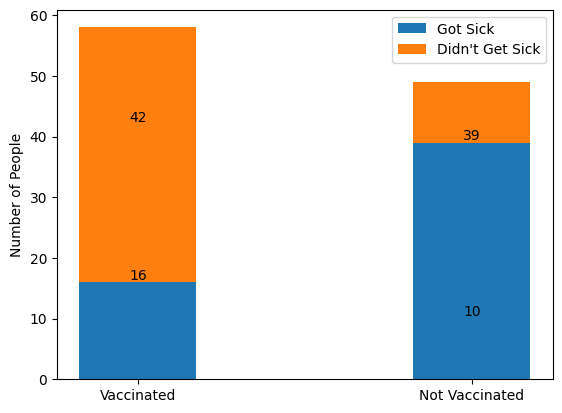

In [35]:
labels = ['Vaccinated', 'Not Vaccinated']
got_sick = [16, 39]
didnt_get_sick = [42, 10]

x = range(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()

rects1 = ax.bar(x, got_sick, width, label='Got Sick')
rects2 = ax.bar(x, didnt_get_sick, width, bottom=got_sick, label="Didn't Get Sick")

ax.set_ylabel('Number of People')
# ax.set_title('Illness by vaccination status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [36]:
data = np.array([got_sick, didnt_get_sick])
data

array([[16, 39],
       [42, 10]])

In [37]:
x_val, pvalue, _, _ = chi2_contingency(data)

if pvalue < 0.05:
    print(f"""The relationship between vaccination and not getting sick is
statistically significant with p-value {pvalue}""")
else:
    print(f"""There is no statistically significant relationship
between vaccination and not getting sick. p-value = {pvalue}""")

The relationship between vaccination and not getting sick is
statistically significant with p-value 2.36058898681215e-07


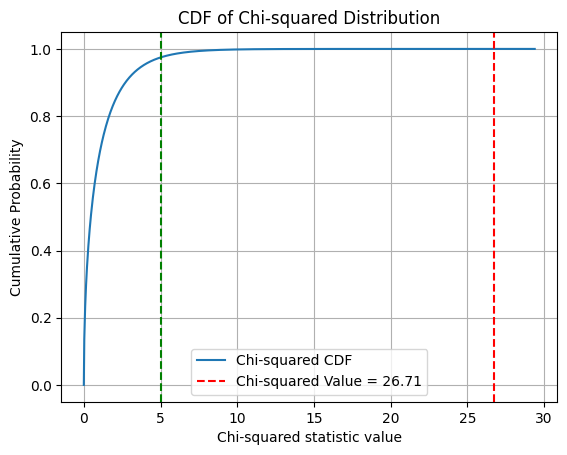

In [47]:
a = 0.05
df = 1  # degrees of freedom; for a 2x2 contingency table it's (2-1)(2-1) = 1
crit_val = chi2.ppf(1 - a/2, df)  # Two-tailed test, so a/2

x = np.linspace(0, x_val*1.1, 1000) 
y = chi2.cdf(x, df)

plt.plot(x, y, label="Chi-squared CDF")

plt.axvline(x=x_val, color='red', linestyle='--', label=f'Chi-squared Value = {x_val:.2f}')
plt.axvline(x=crit_val, color='green', linestyle='--')
plt.title('CDF of Chi-squared Distribution')
plt.xlabel('Chi-squared statistic value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


## Question 2

From question 1, I concluded that from the vaccinated individuals from which only 16 got sick, suggesting a statistically significant protective effect of the vaccine against covid-19. I will conduct tests, altering the number of vaccinated individuals who became sick. This will help identify both the minimum and maximum number of vaccinated patients who can get sick while still maintaining a statistically significant difference between the vaccinated and unvaccinated groups.

In [30]:
on_sign_aeria = "bellow"

for sick_vaccinated in range(16, 59):  
    data = [[sick_vaccinated, 39], [58 - sick_vaccinated, 10]]
    _, p, _, _ = chi2_contingency(data)
    if p < 0.05 and on_sign_aeria == "bellow":
        min_acceptable = sick_vaccinated
    elif p >= 0.05:
        max_acceptable = sick_vaccinated
        on_sign_aeria = "above"
    elif p < 0.05 and on_sign_aeria == "above":    
        break  

print(f"""The maximum number of vaccinated people that can get sick 
while still having a statistically significant relationship is {max_acceptable}.
The minimum number is {min_acceptable + 1}""")


The maximum number of vaccinated people that can get sick 
while still having a statistically significant relationship is 54.
The minimum number is 35
